In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Read image & Convert image to gray-scale

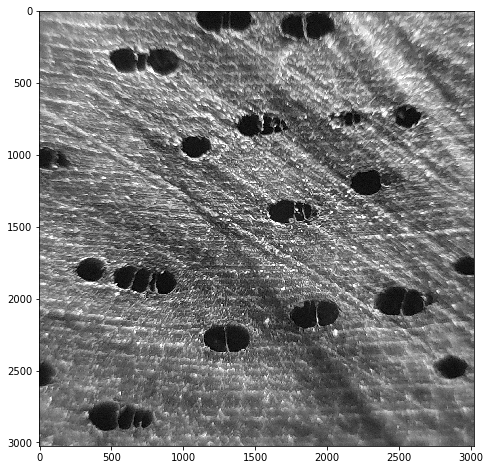

In [2]:
image = 'Asset/E2259 (3).jpg'
#image = 'Asset/6867.jpg'
#image = 'Asset/14734.jpg'
#image = 'Asset/10E1P451.jpg'
#image = 'Asset/20809.jpg'
#image = 'Asset/23255.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
M, N = img.shape

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)

plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(img, cmap='gray')

## Blur Image to Reduce Noise

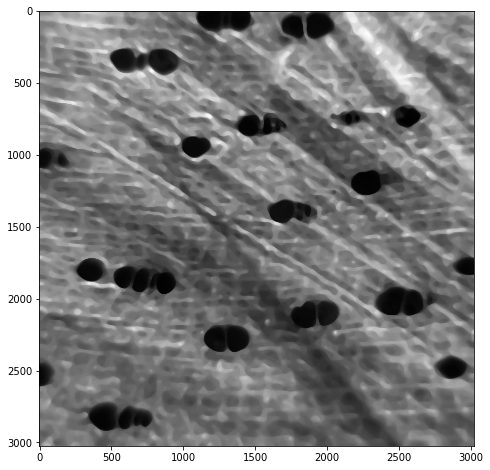

In [3]:
#img = cv2.GaussianBlur(img, (21, 21), cv2.BORDER_DEFAULT)
for _ in range(7):
    img = cv2.medianBlur(img, 21)

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img, cmap='gray')

## Image Thresholding

#### 1. Image Thresholding (Otsu's Binarization)

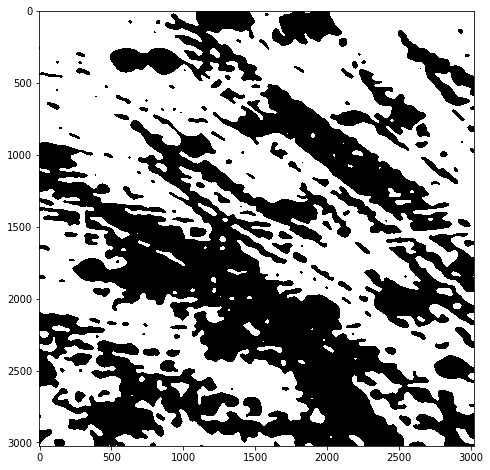

In [4]:
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(th, cmap='gray')

#### 2. Image Thresholding (Adaptive Thresholding)

In [5]:
#th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
#                           cv2.THRhttp://localhost:8888/notebooks/KP%20LIPI%202019/AIKO/circle_detection.ipynb#ESH_BINARY, 31, 20)
#plt.rcParams["figure.figsize"] = (8, 8)
#plt.imshow(th, cmap='gray')

## Apply hough transform on the image

In [6]:
#all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 60, param1=100, 
#                              param2=20, minRadius=30, maxRadius=60)

all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, 
                              param1=50,param2=30, 
                              minRadius=10, maxRadius=150)

In [7]:
if all_circle is not None:
    all_circle_rounded = np.uint16(np.around(all_circle))
    for i in all_circle_rounded[0,:]:
        # draw the outer circle
        cv2.circle(img_orig,(i[0],i[1]),i[2],(0,255,0),15)
        # draw the center of the circle
        cv2.circle(img_orig,(i[0],i[1]),2,(0,0,255),5)

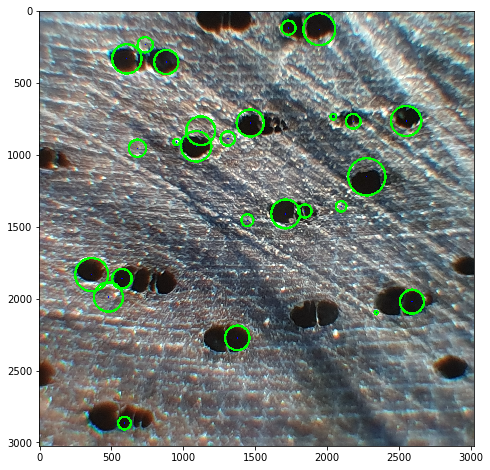

In [8]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img_orig)

## Detected Circles

In [9]:
print(all_circle_rounded)
all_circle_rounded = all_circle_rounded[0].tolist()
detected_circle = len(all_circle_rounded)
print('Detected circle = ', str(detected_circle))

[[[ 366 1832  115]
  [ 610  332  102]
  [1468  778   94]
  [ 884  354   84]
  [1092  940  106]
  [1378 2272   85]
  [2278 1152  129]
  [1714 1410  100]
  [2552  764  105]
  [1124  832  100]
  [2592 2020   83]
  [1948  126  111]
  [ 594 2864   44]
  [ 482 1988  101]
  [1312  886   50]
  [1848 1390   46]
  [1734  116   49]
  [ 576 1860   68]
  [ 956  910   22]
  [2100 1358   36]
  [1448 1454   42]
  [ 738  234   53]
  [2046  734   20]
  [ 684  954   60]
  [2184  766   51]
  [2344 2096   12]]]
Detected circle =  26


###### Average Radius

In [10]:
radius_avg = 0
for i in all_circle_rounded:
    print(i[2])
    radius_avg += i[2]
radius_avg = radius_avg/len(all_circle_rounded)
print('Radius average = ', str(radius_avg))

115
102
94
84
106
85
129
100
105
100
83
111
44
101
50
46
49
68
22
36
42
53
20
60
51
12
Radius average =  71.84615384615384


###### Circle Density

> Calculate density ver.1

In [11]:
dens = (detected_circle * radius_avg) / (M * N)
print('Ver.1 Density = ', str(dens))

Ver.1 Density =  0.00020427409646986365
